### Intro to data types

In [1]:
# we can use the print function to print a string with either " or '
print('hello world! :)')

hello world! :)


In [2]:
# we can set variables of many types e.g. strings
test = 'hello'
print(test)
# this allows us to store data so we can mess with it

hello


In [3]:
# we can find out the data type by using the type function
type(test)
# numeric types can be integers or floats

#integer
number = 10
#float
floaty = 5.4

In [4]:
# numbers can be used together regardless of type

add = number + floaty
print(add)

# some types aren't compatible e.g. integer + string (because it doesn't know whether to add or concatenate)

15.4


### Operators

In [5]:
# operators include + - / *
# division normally makes floats, even when input and output could both be integers
36 / 6

15 // 5

# modulo outputs remainder when dividing
15 % 2

# exponents use **

1

In [6]:
# strings can be concatenated
"foo" + "bar"

# but many operators can't use strings
# e.g. "foo" - "bar"

# strings can even be multiplied
"foo" * 10

'foofoofoofoofoofoofoofoofoofoo'

### Python Collections 

In [7]:
# lists are in []
my_list = [1, '2', 3.2]
print(my_list)

# lists are indexed. this always starts from 0 (unlike R)
# to extract data from these lists we can use the index
print(my_list[0])
# we can also count from the end of the list
print(my_list[-1])

# we can return a subset of the list
print(my_list[0:2]) # returns [1, '2']
# this returns everything from index 1 to the end of the list
print(my_list[1:]) # returns ['2', 3.2]

[1, '2', 3.2]
1
3.2
[1, '2']
['2', 3.2]


In [8]:
# dictionary
# input key:value
# values can be many forms e.g. lists
my_dict = {'one':1, 'two':2, 'three':3, 'a_few_more':[4,5,6]}

# a dictionary isn't indexed, as it uses the keys we input instead
# to return specific values, you have to input the associated key 
print(my_dict['two'])
print(my_dict['a_few_more'])
# can be useful for things like gene names
# it is also often quicker to return values

2
[4, 5, 6]


### version control

In [9]:
# to reduce the storage used, we can save changes instead of saving the whole code with the changes made every time we want to adjust
# this gives us a history of all the changes which can be very useful for e.g. reproducibility, retracing steps
# git is an application used for version control. must be installed
# on this you can save commits (snapshots of changes)
# github allows you to share repositories with all these history trees to a remote server -> not just with other people, also a way to 
# backup code for yourself and share between devices. they can be private or public. if made public you should include a license
# git and github are a bit weird -> guide on the hackpad

# on the terminal (command line) use git init command to activate git
# git status tells us what is tracked/untracked to our commit
# git add hello.ipynb adds our current file to our commit
# this can be reversed with git restore
# it best to add changes in little chunks just in case we want to undo later

# so now we need to make a new commit to save a snapshot to the history tree using git commit
# you need to annotate these changes so you know what's going on later -> will popup for you to add, just annotate and close the window
# now these changes are saved to a new commit in the local instance
# or use git commit -m 'annotations here'

# to sync to the github repository we need to use git push
# this is a bit different if we're not using a github codespace -> check course notes

# you want to commit regularly to track small changes
# typically we don't want to add data files, just code
# to make git ignore these make a .gitignore file
# in this file, list any file/folder we want it to ignore
# to commit everything, use git commit -a
# to undo a git commit, use git reset --soft HEAD~1
# soft just means the changes won't be reversed, just the commit

# you can do an oopsie and go back so far that github has a more recent commit than you
# git does not enjoy this and will complain

### Pandas

In [10]:
# lets use some data!
# we have data on the repository already but it is zipped booooo
# lets unzip it with a terminal command -> we can tell our notebook to run this in the command line using !

! unzip -o data/portal-teachingdb-master.zip # -o just means it can overwrite
# now we have a folder containing our files yay

Archive:  data/portal-teachingdb-master.zip
  inflating: portal-teachingdb-master/surveys2001.csv  
  inflating: portal-teachingdb-master/surveys2002.csv  
  inflating: portal-teachingdb-master/speciesSubset.csv  
  inflating: portal-teachingdb-master/bouldercreek_09_2013.txt  
  inflating: portal-teachingdb-master/species.csv  
  inflating: portal-teachingdb-master/surveys.csv  
  inflating: portal-teachingdb-master/portal_mammals.sqlite  
  inflating: portal-teachingdb-master/README.txt  
  inflating: portal-teachingdb-master/plots.csv  


In [11]:
# using packages
# we have already installed pandas with pip install. you can't import until this point
import pandas as pd
# the 'as' aliases pandas as pd
# this means we can now use functions from pandas with pd.<function>, instead of pandas.<function>

In [12]:
# reading a file in
pd.read_csv('portal-teachingdb-master/surveys.csv')
# to be able to mess around in this, we want to assign it to a variable
surveys_df = pd.read_csv('portal-teachingdb-master/surveys.csv')
# this is now saved as an object. pandas also indexes this data, also starts from 0
# we can run functions attached to objects -> the type of dataframe here has a function head attached
surveys_df.head()
type(surveys_df)

pandas.core.frame.DataFrame

In [13]:

# we can have a lil look at our data
surveys_df.dtypes
# this isn't a function! this just pulls out data that pandas has already added about the data types
# pandas is based on numpy so the data types are slightly different than standard python types e.g. int64 vs integer

record_id            int64
month                int64
day                  int64
year                 int64
plot_id              int64
species_id          object
sex                 object
hindfoot_length    float64
weight             float64
dtype: object

In [14]:
# pandas adds some other data too, which can be added in the same way
surveys_df.columns
surveys_df.index
surveys_df.shape # output is tupple

(35549, 9)

In [15]:
# we can call columns. as series (single dimension)
surveys_df['hindfoot_length']
# NaN
# NaN indicates missing data in pandas. although not numerical, they are treated as floats

# we can call rows using the index. same logic as with lists
surveys_df[1:2] # this calls the second row
surveys_df[:100] # this calls the first 100 rows

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
...,...,...,...,...,...,...,...,...,...
95,96,8,20,1977,12,DM,M,36.0,41.0
96,97,8,20,1977,18,DM,M,36.0,41.0
97,98,8,20,1977,5,DM,M,38.0,40.0
98,99,8,20,1977,11,DM,M,37.0,45.0


In [16]:
# lets cronch some numbers
# descriptive statistics
# we can call functions from individual columns
surveys_df['weight'].describe()
# this excludes the NaNs as standard

count    32283.000000
mean        42.672428
std         36.631259
min          4.000000
25%         20.000000
50%         37.000000
75%         48.000000
max        280.000000
Name: weight, dtype: float64

In [17]:
# alternatively we can get specific descriptive stats e.g.
surveys_df['weight'].std()
surveys_df['weight'].mean()
surveys_df['weight'].min()

4.0

### Grouping data

In [18]:
# with pandas we can group the entire dataset using groupby
gr_sex = surveys_df.groupby('sex')
# this data looks a bit funky ngl. can print, head or tail to see
gr_sex['weight'].describe()
gr_sex['weight'].mean()

sex
F    42.170555
M    42.995379
Name: weight, dtype: float64

In [19]:
# you can groupby multiple factors to further subset our data
desired_cols = ['weight','sex']
sex_weight = surveys_df[desired_cols]
print(sex_weight)

       weight  sex
0         NaN    M
1         NaN    M
2         NaN    F
3         NaN    M
4         NaN    M
...       ...  ...
35544     NaN  NaN
35545     NaN  NaN
35546    14.0    F
35547    51.0    M
35548     NaN  NaN

[35549 rows x 2 columns]


In [22]:
# vectorised maths on columns
# lets drop NaNs first
surveys_df['weight'].dropna()
# imagine we want to correct this data because we know all values need to be increased by 10%
surveys_df['weight'].dropna() * 1.1
# this doesn't change the original data
# if we want it to change the original data, we can do that!
surveys_df['weights'] = surveys_df['weight'].dropna() * 1.1
print(surveys_df['weights'])

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
35544     NaN
35545     NaN
35546    15.4
35547    56.1
35548     NaN
Name: weights, Length: 35549, dtype: float64


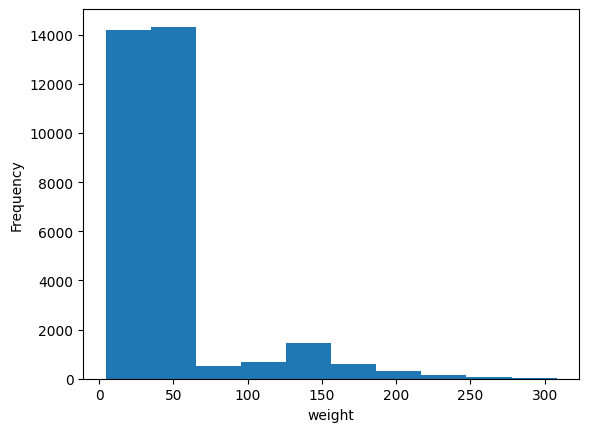

In [31]:
# pip install matplotlib and restart
# lets make a plot babeee
surveys_df['weights'].plot(kind='hist',xlabel='weight')
import matplotlib.pyplot as plt
# to save a fig. 
plt.savefig('figures/weights_hist.png',dpi=300)
# typically don't commit the figures either, as we are not committing the data

In [24]:
surveys_df.head()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,weights
0,1,7,16,1977,2,NL,M,32.0,NaN,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN,NaN


### subsetting

In [37]:
# conditional subsetting
# lets use some logical comparisons!
surveys_df['year'] == 1998
# boolean = true/false. this creates a boolean mask
# we can use these to subset data
yr1998 = surveys_df[surveys_df['year'] == 1998]
print(yr1998)

       record_id  month  day  year  plot_id species_id  sex  hindfoot_length   
27413      27414      1   31  1998       12         DM    F             35.0  \
27414      27415      1   31  1998       12         DM    M             36.0   
27415      27416      1   31  1998       12         DM    F             34.0   
27416      27417      1   31  1998       20         PM    F             20.0   
27417      27418      1   31  1998       19         OT    M             21.0   
...          ...    ...  ...   ...      ...        ...  ...              ...   
29018      29019     12   23  1998       15         AH  NaN              NaN   
29019      29020     12   23  1998        5         DM    F             36.0   
29020      29021     12   23  1998        5         PM    M             21.0   
29021      29022     12   23  1998       10         PM    M             22.0   
29022      29023     12   23  1998       16         RM    M             16.0   

       weight  weights  
27413    41.0 

In [42]:
# we can combine these together easily
# & requires both to be true
bool_mask = (surveys_df['sex'] == 'F') & (surveys_df['year'] == 1998)
surveys_df[bool_mask]
data_1998F = surveys_df[bool_mask]
print(data_1998F)

       record_id  month  day  year  plot_id species_id sex  hindfoot_length   
27413      27414      1   31  1998       12         DM   F             35.0  \
27415      27416      1   31  1998       12         DM   F             34.0   
27416      27417      1   31  1998       20         PM   F             20.0   
27419      27420      1   31  1998       18         PM   F             26.0   
27425      27426      1   31  1998        2         DS   F             51.0   
...          ...    ...  ...   ...      ...        ...  ..              ...   
29008      29009     12   23  1998       13         DM   F             36.0   
29009      29010     12   23  1998       13         PB   F             26.0   
29012      29013     12   23  1998       14         DM   F             37.0   
29013      29014     12   23  1998       14         OT   F             20.0   
29019      29020     12   23  1998        5         DM   F             36.0   

       weight  weights  
27413    41.0     45.1  
2

In [43]:
# exporting data using pandas

data_1998F.to_csv('data/subset_1998F.csv')